In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add

%matplotlib inline

In [125]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [127]:
missing_data = data.isnull().sum()
total_percentage_of_missing_data = (missing_data.sum()/data.shape[0]) * 100
print(f'total percentage of missing data = {round(total_percentage_of_missing_data,2)}%')

total percentage of missing data = 15.21%


In [128]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_total_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total_missing_data, percent_total_of_missing_data], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


In [129]:
data['glucose']= data['glucose'].replace(np.NaN,data['glucose'].mean())
data['education']= data['education'].replace(np.NaN,data['education'].mean())
# data['BPMeds']= data['BPMeds'].replace(np.NaN,data['BPMeds'].mean())
# data['totChol']= data['totChol'].replace(np.NaN,data['totChol'].mean())


In [130]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_total_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total_missing_data, percent_total_of_missing_data], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


In [131]:
data.dropna(axis=0, inplace=True)
data.shape

(4090, 16)

<ipython-input-132-62628a64ed50>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


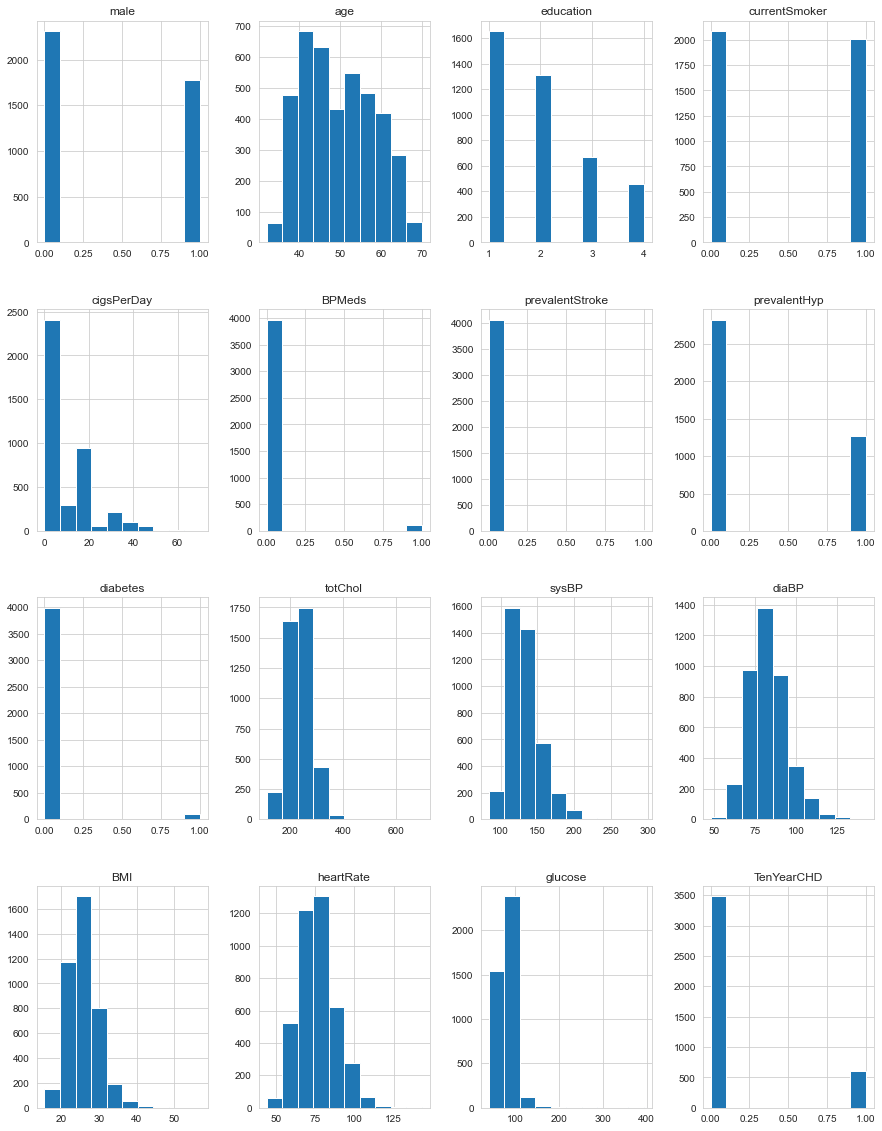

In [132]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

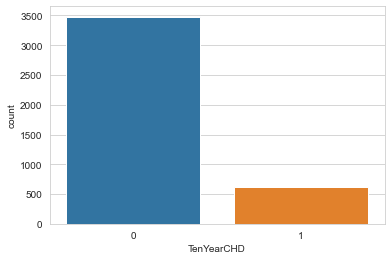

There are 3479 patients without heart disease and 611  with the disease


In [133]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]}  with the disease")


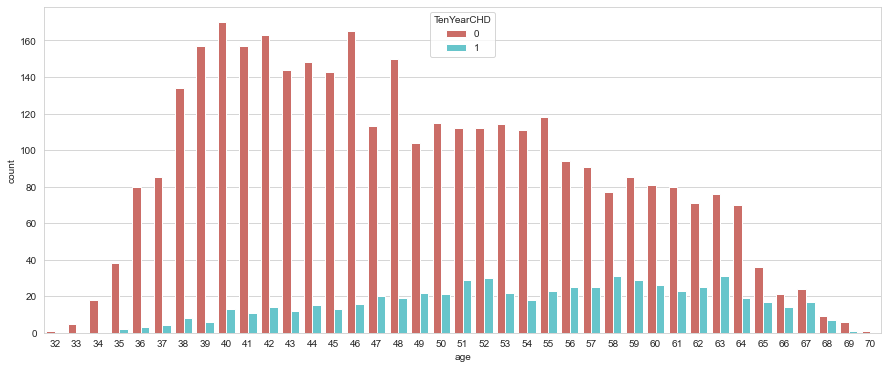

In [134]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='hls')
plt.show()

In [135]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])
    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))
        
    for item in ([ax.title]):
        item.set_fontsize(27)
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')
    

<ipython-input-135-14a3631fd434>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])


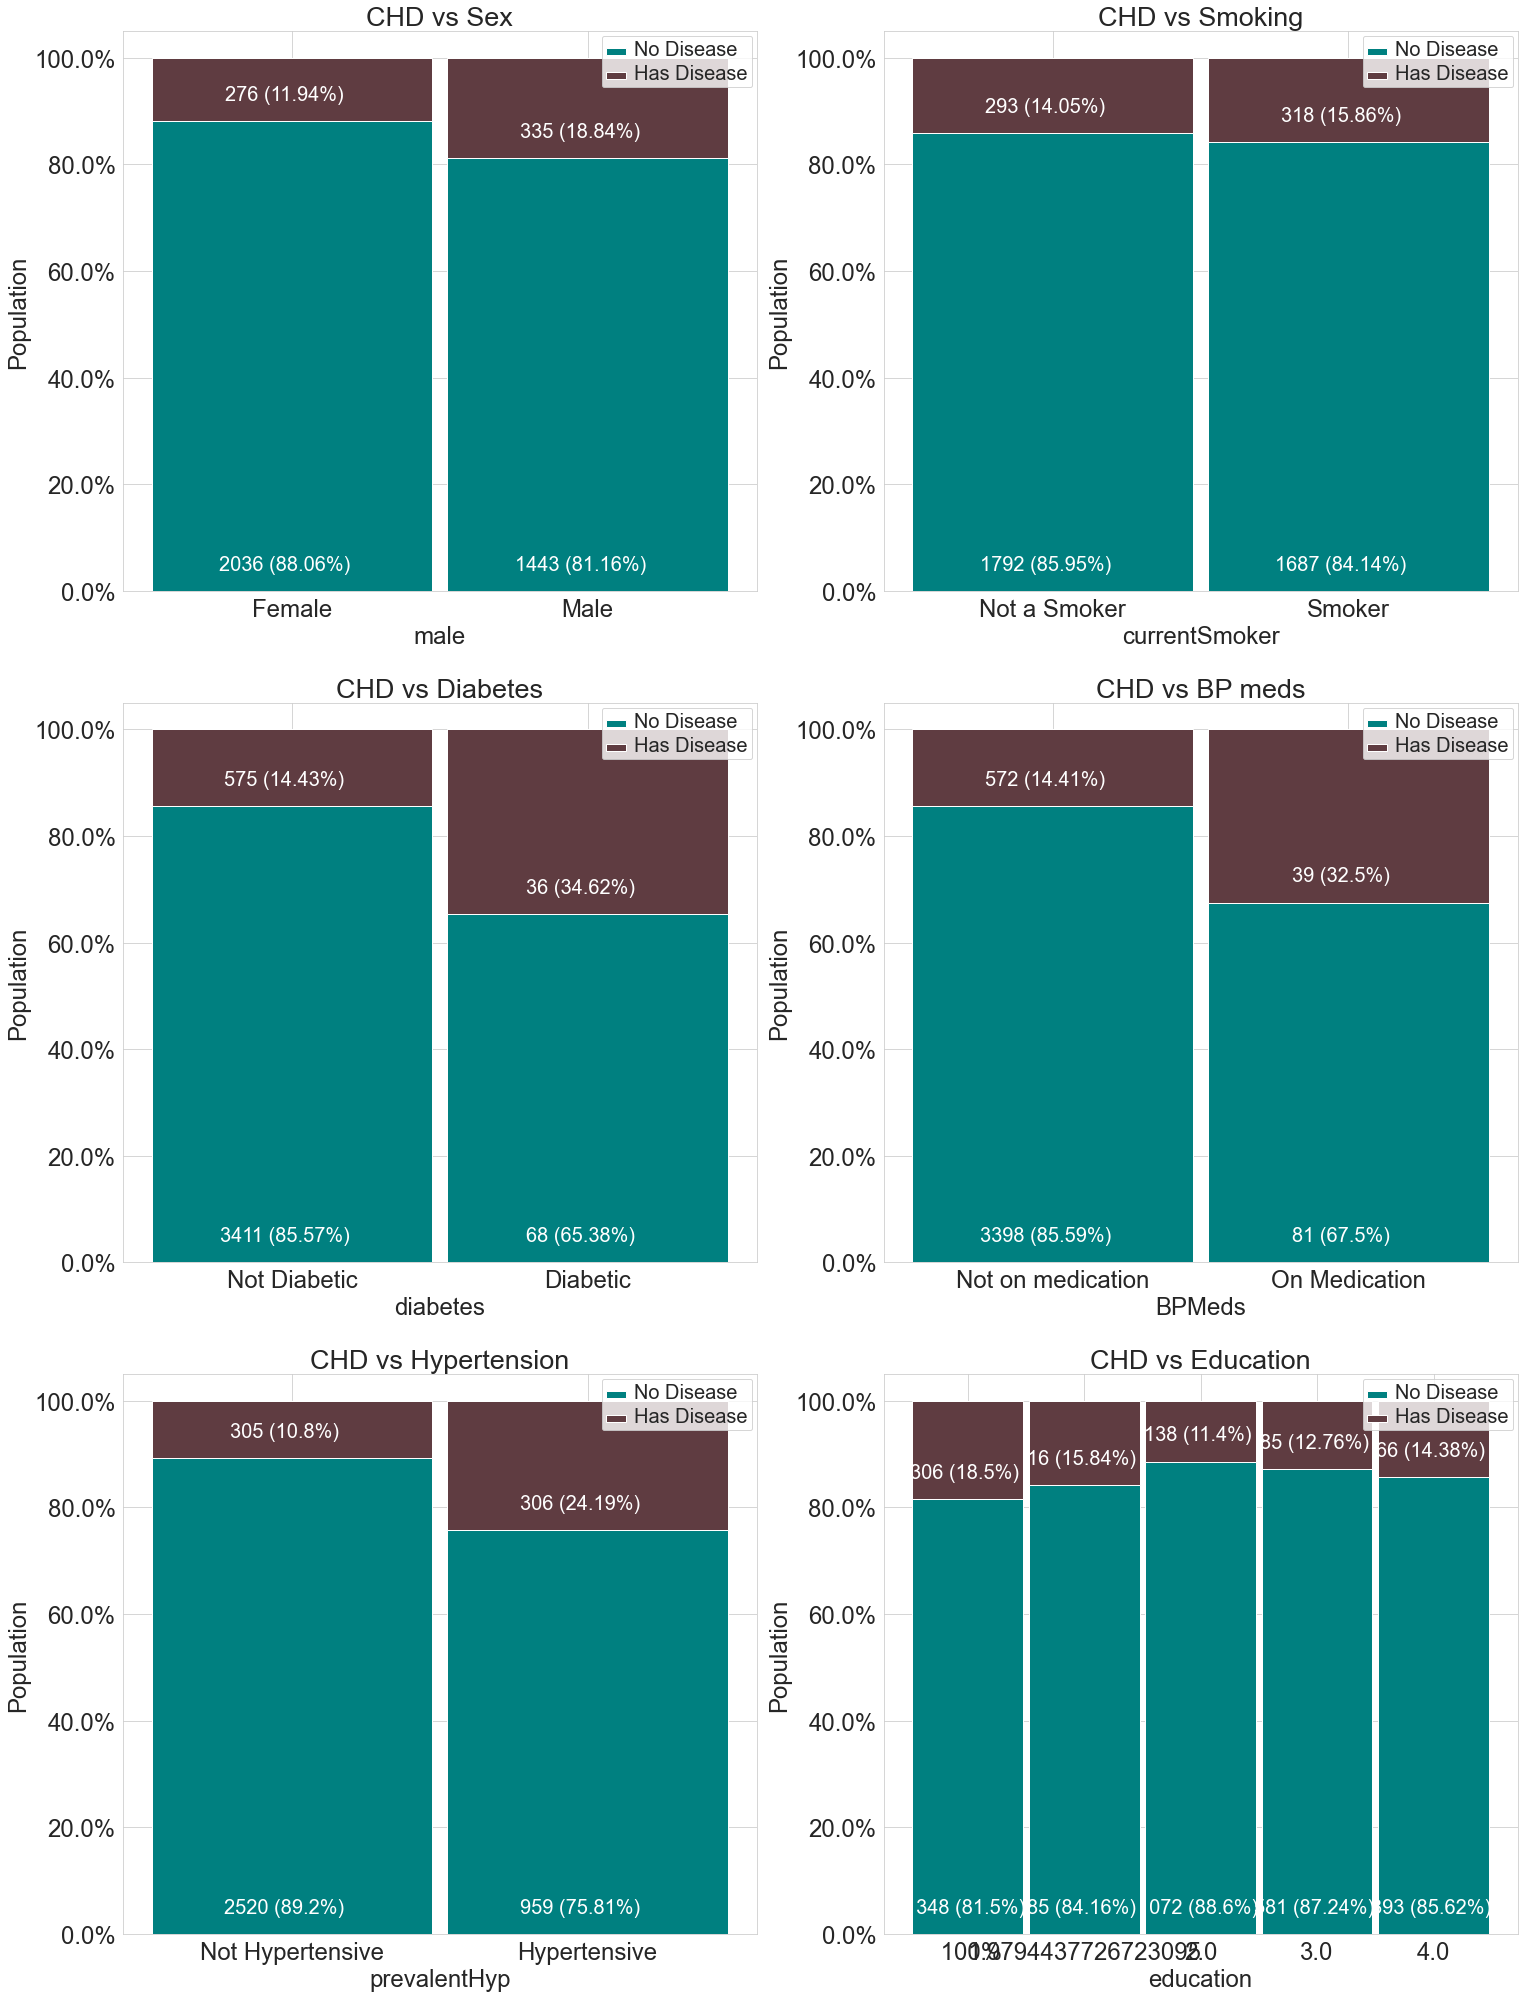

In [136]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

plt.subplot(grid_rows, grid_cols, 6)
temp = data[['education','TenYearCHD']].groupby(['education','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'0%', 1:' 100%'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Education', ylabel = 'Population')



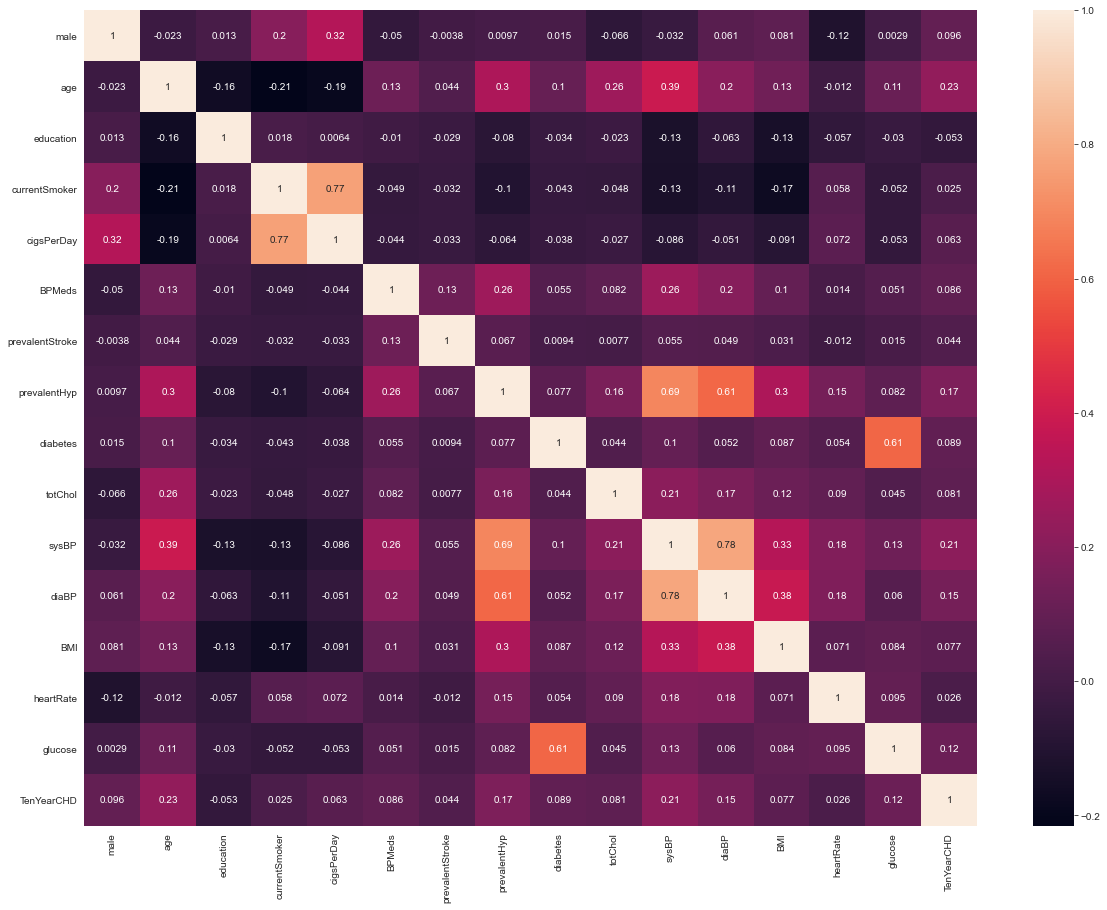

In [137]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [138]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [139]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')  
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	10
Itera

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x20FD7B69540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x20FD7B69540, verbose=2)

In [140]:
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [141]:
top_features = data.columns[:-1][feat_selector.ranking_ <=7].tolist()
top_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [142]:
import statsmodels.api as sm

In [143]:
X_top = data[top_features]
y = data['TenYearCHD']
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.409843
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4090
Model:                          Logit   Df Residuals:                     4082
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                 0.02799
Time:                        20:00:21   Log-Likelihood:                -1676.3
converged:                       True   LL-Null:                       -1724.5
Covariance Type:            nonrobust   LLR p-value:                 5.541e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0258      0.005      4.715      0.000       0.015       0.037
cigsPerDay     0.0177      0.004      4.927      0.000       0.011       0.025
totChol       -0.0037      0.001     -3.496      0.000      -0.006      -0.002
sysBP          0.0249      0.003      7.693      0.000       0.019       0.031
diaBP         -0.0275      0.006     -4.799      0.000      -0.039      -0.016
BMI           -0.0534      0.012     -4.597      0.000      -0.076      -0.031
heartRate     -0.0308      0.004     -8.504      0.000      -0.038      -0.024
glucose        0.0040      0.002      2.447      0.014       0.001       0.007
==============================================================================
"""

In [144]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                  5%       95%  Odds Ratio
age         1.015213  1.037259    1.026177
cigsPerDay  1.010737  1.025100    1.017893
totChol     0.994260  0.998381    0.996318
sysBP       1.018721  1.031721    1.025200
diaBP       0.961996  0.983859    0.972866
BMI         0.926630  0.969822    0.947980
heartRate   0.962779  0.976558    0.969644
glucose     1.000803  1.007290    1.004041


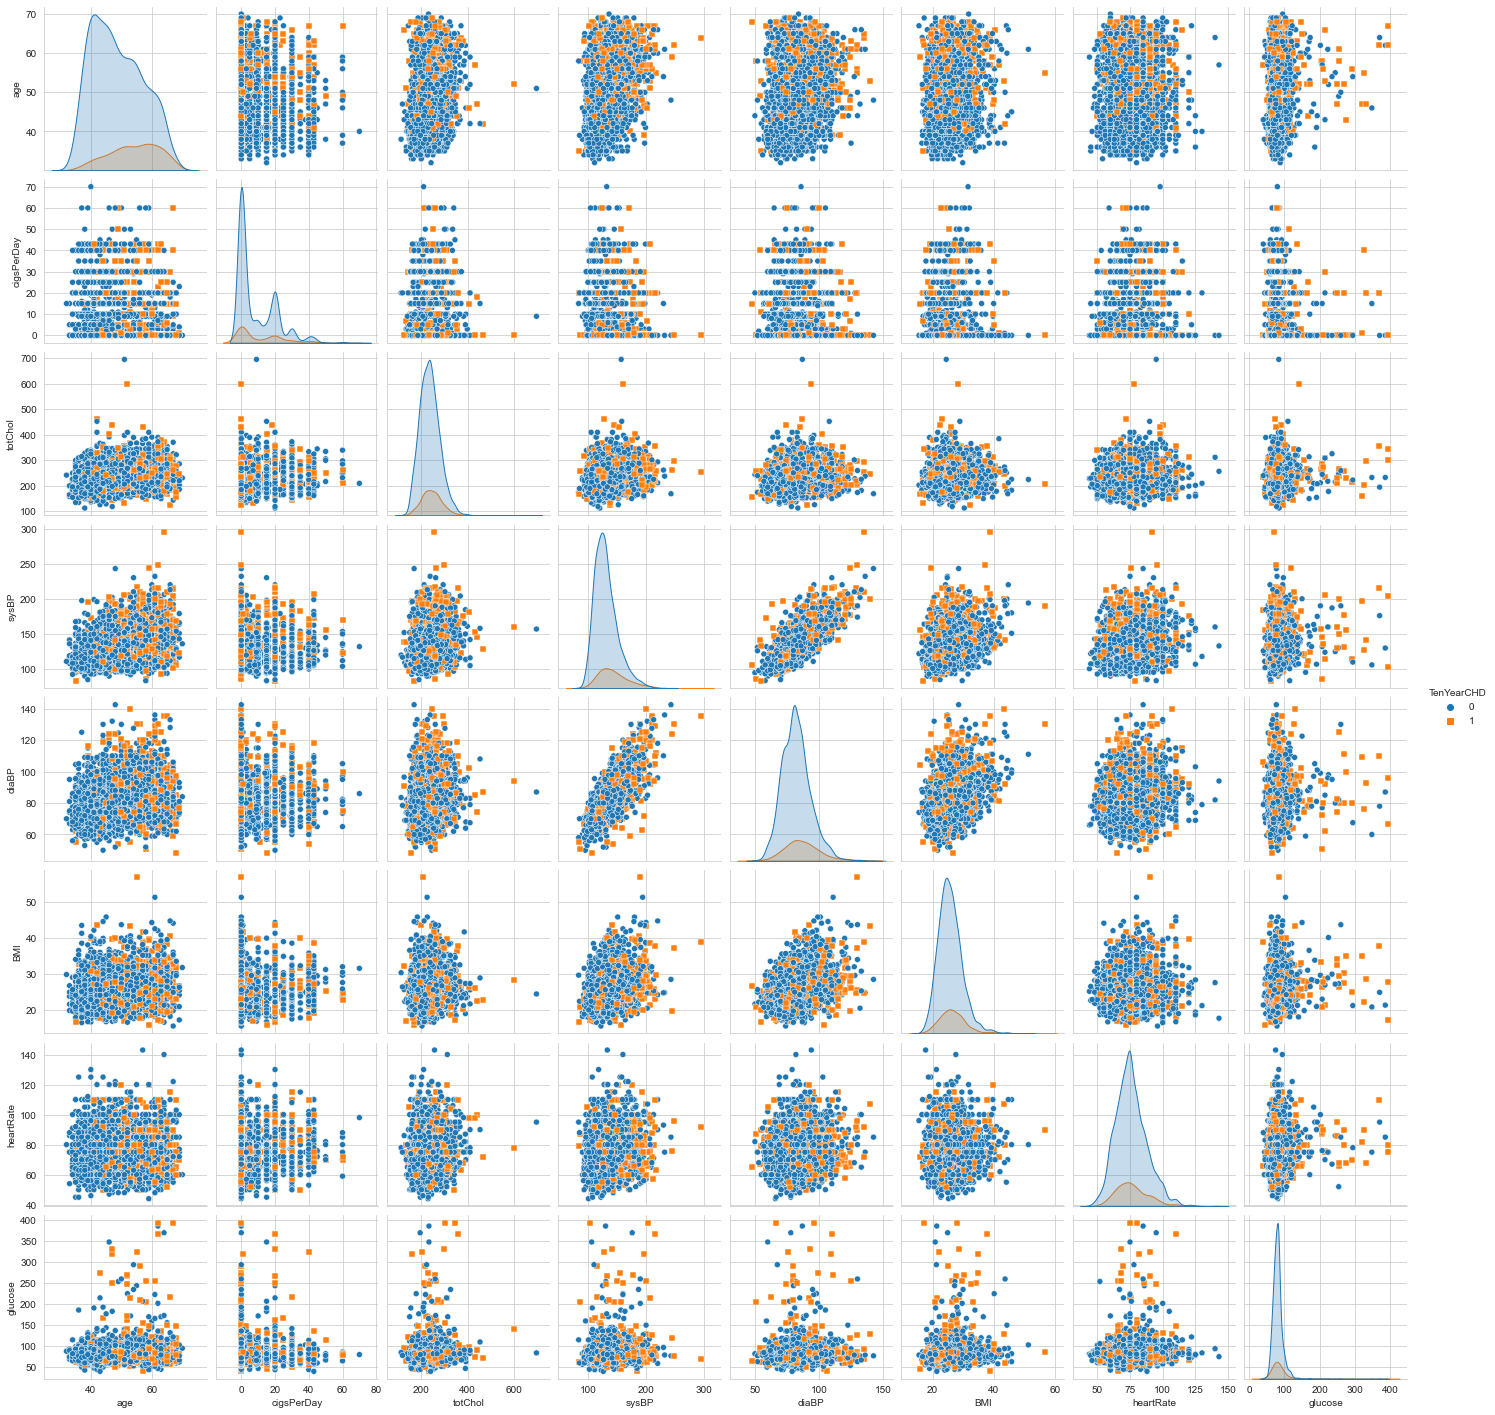

In [145]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features)

In [146]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [147]:
X = data[top_features]
y = data.iloc[:,-1]

In [148]:
num_before = dict(Counter(y))
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smote, y_smote = pipeline.fit_resample(X, y)
num_after =dict(Counter(y_smote))
print(num_before, num_after)



{0: 3479, 1: 611} {0: 3478, 1: 2783}


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


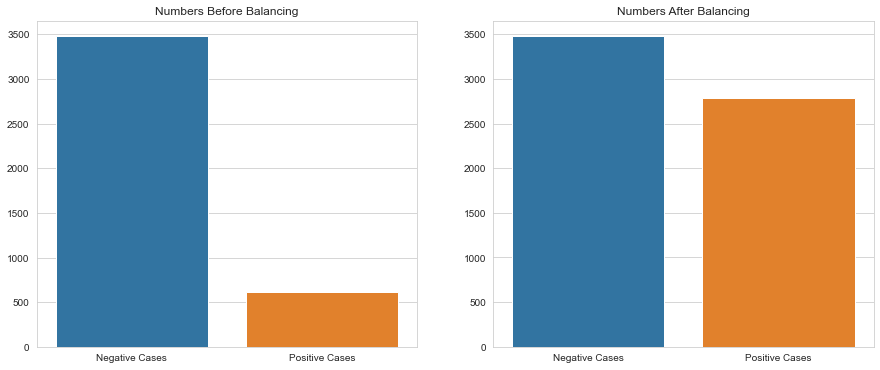

In [149]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [150]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

 

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,44,20.0,211.0,145.0,88.0,23.39,60.0,79.0,0
1,61,0.0,325.0,125.5,85.5,24.40,68.0,70.0,0
2,44,0.0,206.0,121.0,81.0,24.12,64.0,77.0,0
3,46,6.0,315.0,165.0,85.0,32.89,110.0,91.0,0
4,57,0.0,201.0,108.5,70.5,22.90,50.0,84.0,0


In [151]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,44,20.0,211.0,145.0,88.0,23.39,60.0,79.0
1,61,0.0,325.0,125.5,85.5,24.40,68.0,70.0
2,44,0.0,206.0,121.0,81.0,24.12,64.0,77.0
3,46,6.0,315.0,165.0,85.0,32.89,110.0,91.0
4,57,0.0,201.0,108.5,70.5,22.90,50.0,84.0


In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)



from sklearn.preprocessing import StandardScaler


In [153]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [155]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [156]:
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [157]:
logistic_predict = logistic_clf.predict(X_test)
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.56%


In [158]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [159]:
svm_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [160]:
svm_predict = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 90.34%


<AxesSubplot:>

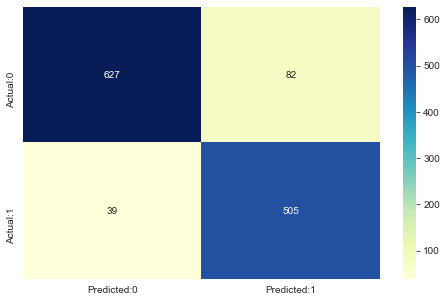

In [161]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [162]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       709
           1       0.86      0.93      0.89       544

    accuracy                           0.90      1253
   macro avg       0.90      0.91      0.90      1253
weighted avg       0.91      0.90      0.90      1253



In [163]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 89.3%


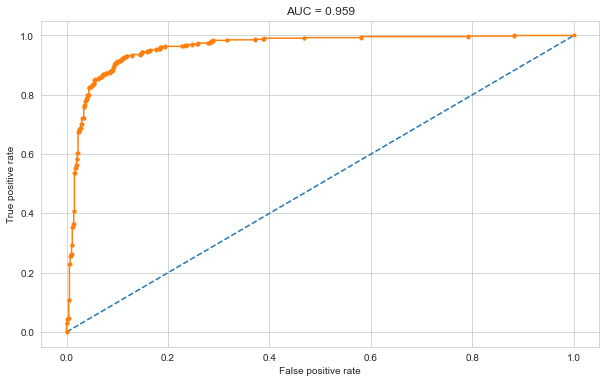

In [164]:
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()